In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [2]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy

def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended



def is_mjj(month):
    return (month>=5) & (month<=7)
def is_jja(month):
    return (month>=6) & (month<=8)
def is_nd(month):
    return (month==11) | (month==12)

def is_mam(month):
    return (month>=3) & (month<=5)
def is_nd(month):
    return (month==11) | (month==12)

dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'
path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'

data_oras5 = '/media/aprigent/Arthur_disk/Data/ORA-S5/'
dir_thetao_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/thetao/mon/'
#dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/thetao/mon/'
#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'

period_str = 1985
period_end = 2004
%matplotlib inline

# Wrap it into a simple function
def season_mean(ds, calendar="standard"):
    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = ds.time.dt.days_in_month

    # Calculate the weights by grouping by 'time.season'
    weights = (
        month_length.groupby("time.season") / month_length.groupby("time.season").sum()
    )

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby("time.season").sum(dim="time")

/tmp/ipykernel_16091/3578289315.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
omip1_models = pd.read_csv(dir_proj+'/scripts/omip1_models_for_BF_zos.txt',header=None,delimiter=',')
omip1_models = omip1_models[0].values.tolist()
print(omip1_models)


omip2_models = pd.read_csv(dir_proj+'/scripts/omip2_models_for_BF_zos.txt',header=None,delimiter=',')
omip2_models = omip2_models[0].values.tolist()
print(omip2_models)

['CMCC-CM2-SR5', 'CMCC-ESM2', 'EC-Earth3', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'NorESM2-LM']
['ACCESS-OM2', 'ACCESS-OM2-025', 'CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'EC-Earth3', 'MRI-ESM2-0', 'NorESM2-LM']


# Load data 
- TAV_OMIP/scripts/processing/prepare_temperature_eq_omip1.ipynb
- TAV_OMIP/scripts/processing/prepare_temperature_af_omip1.ipynb

### MOM-JRA55

In [4]:

thetao_eq_mom = xr.open_dataset(path_data_out+'temp_mom_JRA55_eq_1985_2004.nc')


dtdz_eq_mom = xr.open_dataset(path_data_out+'dtdz_mom_eq_1985_2004_newtest.nc')


### ORA-S5

In [5]:

thetao_eq_oras5 = xr.open_dataset(path_data_out+'temp_oras5_eq_1985_2004.nc')


dtdz_eq_oras5 = xr.open_dataset(path_data_out+'dtdz_oras5_eq_1985_2004_newtest.nc')



mld_eq_oras5 = xr.open_dataset(path_data_out+'mld_oras5_1985_2004.nc')


### OMIP1

In [6]:

## temp ##

thetao_eq_omip1 = xr.open_dataset(path_data_out+'temp_omip1_eq_1985_2004_new.nc')


## dtdz ##

dtdz_eq_omip1 = xr.open_dataset(path_data_out+'dtdz_eq_omip1_1985_2004_newtest_new.nc')


## mld ## 

mld_eq_omip1 = xr.open_dataset(path_data_out+'mld_omip1_eq_1985_2004_cycle5.nc')


## OMIP2

In [7]:

## temp ##

thetao_eq_omip2 = xr.open_dataset(path_data_out+'temp_omip2_eq_1985_2004.nc')


## dtdz ##

dtdz_eq_omip2 = xr.open_dataset(path_data_out+'dtdz_eq_omip2_1985_2004_newtest.nc')



## mld ## 
mld_eq_omip2 = xr.open_dataset(path_data_out+'mld_omip2_eq_1985_2004.nc')


# MOM 

In [8]:
## dtdz ##

thetao_eq_mom = xr.open_dataset(path_data_out+'temp_mom_JRA55_eq_1985_2004.nc')
dtdz_eq_mom = xr.open_dataset(path_data_out+'dtdz_mom_eq_1985_2004_newtest.nc')
mld_eq_mom = xr.open_dataset(path_data_out+'mld_mom_JRA55_eq_1985_2004.nc')



thetao_eq_mom025 = xr.open_dataset(path_data_out+'temp_mom025_JRA55_eq_1985_2004.nc')
dtdz_eq_mom025 = xr.open_dataset(path_data_out+'dtdz_mom025_eq_1985_2004_newtest.nc')
mld_eq_mom025 = xr.open_dataset(path_data_out+'mld_mom025_eq_1985_2004.nc')


thetao_eq_mom_core2 = xr.open_dataset(path_data_out+'temp_mom_JRA55_core2_eq_1985_2004.nc')
dtdz_eq_mom_core2 = xr.open_dataset(path_data_out+'dtdz_mom_core2_eq_1985_2004_newtest.nc')
mld_eq_mom_core2 = xr.open_dataset(path_data_out+'mld_mom_JRA55_core2_eq_1985_2004.nc')


thetao_eq_mom_heat = xr.open_dataset(path_data_out+'temp_mom_JRA55_core2_heat_eq_1985_2004.nc')
dtdz_eq_mom_heat = xr.open_dataset(path_data_out+'dtdz_mom_core2_heat_eq_1985_2004_newtest.nc')
mld_eq_mom_heat = xr.open_dataset(path_data_out+'mld_mom_JRA55_core2_heat_eq_1985_2004.nc')


##  Seasonal mean

In [9]:

## ORA-S5 ##

dtdz_eq_oras5_mam = dtdz_eq_oras5.dtdz.sel(time=is_mam(dtdz_eq_oras5.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_oras5_mam = dtdz_eq_oras5.dtdz_max.sel(time=is_mam(dtdz_eq_oras5.dtdz_max['time.month'])).mean(dim='time')


dtdz_eq_oras5_mjj = dtdz_eq_oras5.dtdz.sel(time=is_mjj(dtdz_eq_oras5.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_oras5_mjj = dtdz_eq_oras5.dtdz_max.sel(time=is_mjj(dtdz_eq_oras5.dtdz_max['time.month'])).mean(dim='time')

mld_eq_oras5_mjj = mld_eq_oras5.mld.sel(time=is_mjj(mld_eq_oras5.mld['time.month'])).mean(dim='time')
mld_eq_oras5_mjj_mean = mld_eq_oras5_mjj.mean(dim='lat')

## omip1 ##

dtdz_eq_omip1_mam = dtdz_eq_omip1.dtdz.sel(time=is_mam(dtdz_eq_omip1.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_omip1_mam = dtdz_eq_omip1.dtdz_max.sel(time=is_mam(dtdz_eq_omip1.dtdz_max['time.month'])).mean(dim='time')


dtdz_eq_omip1_mjj = dtdz_eq_omip1.dtdz.sel(time=is_mjj(dtdz_eq_omip1.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_omip1_mjj = dtdz_eq_omip1.dtdz_max.sel(time=is_mjj(dtdz_eq_omip1.dtdz_max['time.month'])).mean(dim='time')
mld_eq_omip1_mjj = mld_eq_omip1.mld.sel(time=is_mjj(mld_eq_omip1.mld['time.month'])).mean(dim='time')



## omip2 ##

dtdz_eq_omip2_mam = dtdz_eq_omip2.dtdz.sel(time=is_mam(dtdz_eq_omip2.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_omip2_mam = dtdz_eq_omip2.dtdz_max.sel(time=is_mam(dtdz_eq_omip2.dtdz_max['time.month'])).mean(dim='time')

dtdz_eq_omip2_mjj = dtdz_eq_omip2.dtdz.sel(time=is_mjj(dtdz_eq_omip2.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_omip2_mjj = dtdz_eq_omip2.dtdz_max.sel(time=is_mjj(dtdz_eq_omip2.dtdz_max['time.month'])).mean(dim='time')
mld_eq_omip2_mjj = mld_eq_omip2.mld.sel(time=is_mjj(mld_eq_omip2.mld['time.month'])).mean(dim='time')


## MOM ##


mld_eq_mom_mjj = mld_eq_mom.mld.sel(time=is_mjj(mld_eq_mom.mld['time.month'])).mean(dim='time')
mld_eq_mom025_mjj = mld_eq_mom025.mld.sel(time=is_mjj(mld_eq_mom025.mld['time.month'])).mean(dim='time')
mld_eq_mom_core2_mjj = mld_eq_mom_core2.mld.sel(time=is_mjj(mld_eq_mom_core2.mld['time.month'])).mean(dim='time')
mld_eq_mom_heat_mjj = mld_eq_mom_heat.mld.sel(time=is_mjj(mld_eq_mom_heat.mld['time.month'])).mean(dim='time')


dtdzmax_eq_mom_mjj = dtdz_eq_mom.dtdz_max.sel(time=is_mjj(dtdz_eq_mom.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_mom025_mjj = dtdz_eq_mom025.dtdz_max.sel(time=is_mjj(dtdz_eq_mom025.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_mom_core2_mjj = dtdz_eq_mom_core2.dtdz_max.sel(time=is_mjj(dtdz_eq_mom_core2.dtdz_max['time.month'])).mean(dim='time')
dtdzmax_eq_mom_heat_mjj = dtdz_eq_mom_heat.dtdz_max.sel(time=is_mjj(dtdz_eq_mom_heat.dtdz_max['time.month'])).mean(dim='time')


dtdz_eq_mom_mjj = dtdz_eq_mom.dtdz.sel(time=is_mjj(dtdz_eq_mom.dtdz['time.month'])).mean(dim='time')
dtdz_eq_mom025_mjj = dtdz_eq_mom025.dtdz.sel(time=is_mjj(dtdz_eq_mom025.dtdz['time.month'])).mean(dim='time')
dtdz_eq_mom_core2_mjj = dtdz_eq_mom_core2.dtdz.sel(time=is_mjj(dtdz_eq_mom_core2.dtdz['time.month'])).mean(dim='time')
dtdz_eq_mom_heat_mjj = dtdz_eq_mom_heat.dtdz.sel(time=is_mjj(dtdz_eq_mom_heat.dtdz['time.month'])).mean(dim='time')


In [10]:
dtdzmax_eq_oras5_mjj_atl3 = dtdzmax_eq_oras5_mjj.where((dtdzmax_eq_oras5_mjj.lon>=-20)&
                                                       (dtdzmax_eq_oras5_mjj.lon<=0)
                                                       )


dtdzmax_eq_omip1_mjj_atl3 = dtdzmax_eq_omip1_mjj.where((dtdzmax_eq_omip1_mjj.lon>=-20)&
                                                       (dtdzmax_eq_omip1_mjj.lon<=0)
                                                       )

dtdzmax_eq_omip2_mjj_atl3 = dtdzmax_eq_omip2_mjj.where((dtdzmax_eq_omip2_mjj.lon>=-20)&
                                                       (dtdzmax_eq_omip2_mjj.lon<=0)
                                                       )


dtdzmax_eq_mom_mjj_atl3 = dtdzmax_eq_mom_mjj.where((dtdzmax_eq_mom_mjj.lon>=-20)&
                                                       (dtdzmax_eq_mom_mjj.lon<=0)
                                                       )

dtdzmax_eq_mom025_mjj_atl3 = dtdzmax_eq_mom025_mjj.where((dtdzmax_eq_mom025_mjj.lon>=-20)&
                                                       (dtdzmax_eq_mom025_mjj.lon<=0)
                                                       )


dtdzmax_eq_mom_core2_mjj_atl3 = dtdzmax_eq_mom_core2_mjj.where((dtdzmax_eq_mom_core2_mjj.lon>=-20)&
                                                       (dtdzmax_eq_mom_core2_mjj.lon<=0)
                                                       )

dtdzmax_eq_mom_heat_mjj_atl3 = dtdzmax_eq_mom_heat_mjj.where((dtdzmax_eq_mom_heat_mjj.lon>=-20)&
                                                       (dtdzmax_eq_mom_heat_mjj.lon<=0)
                                                       )

# Figure S3

### OMIP1

Text(0.5, 0, 'Longitude ($^{\\circ}$)')

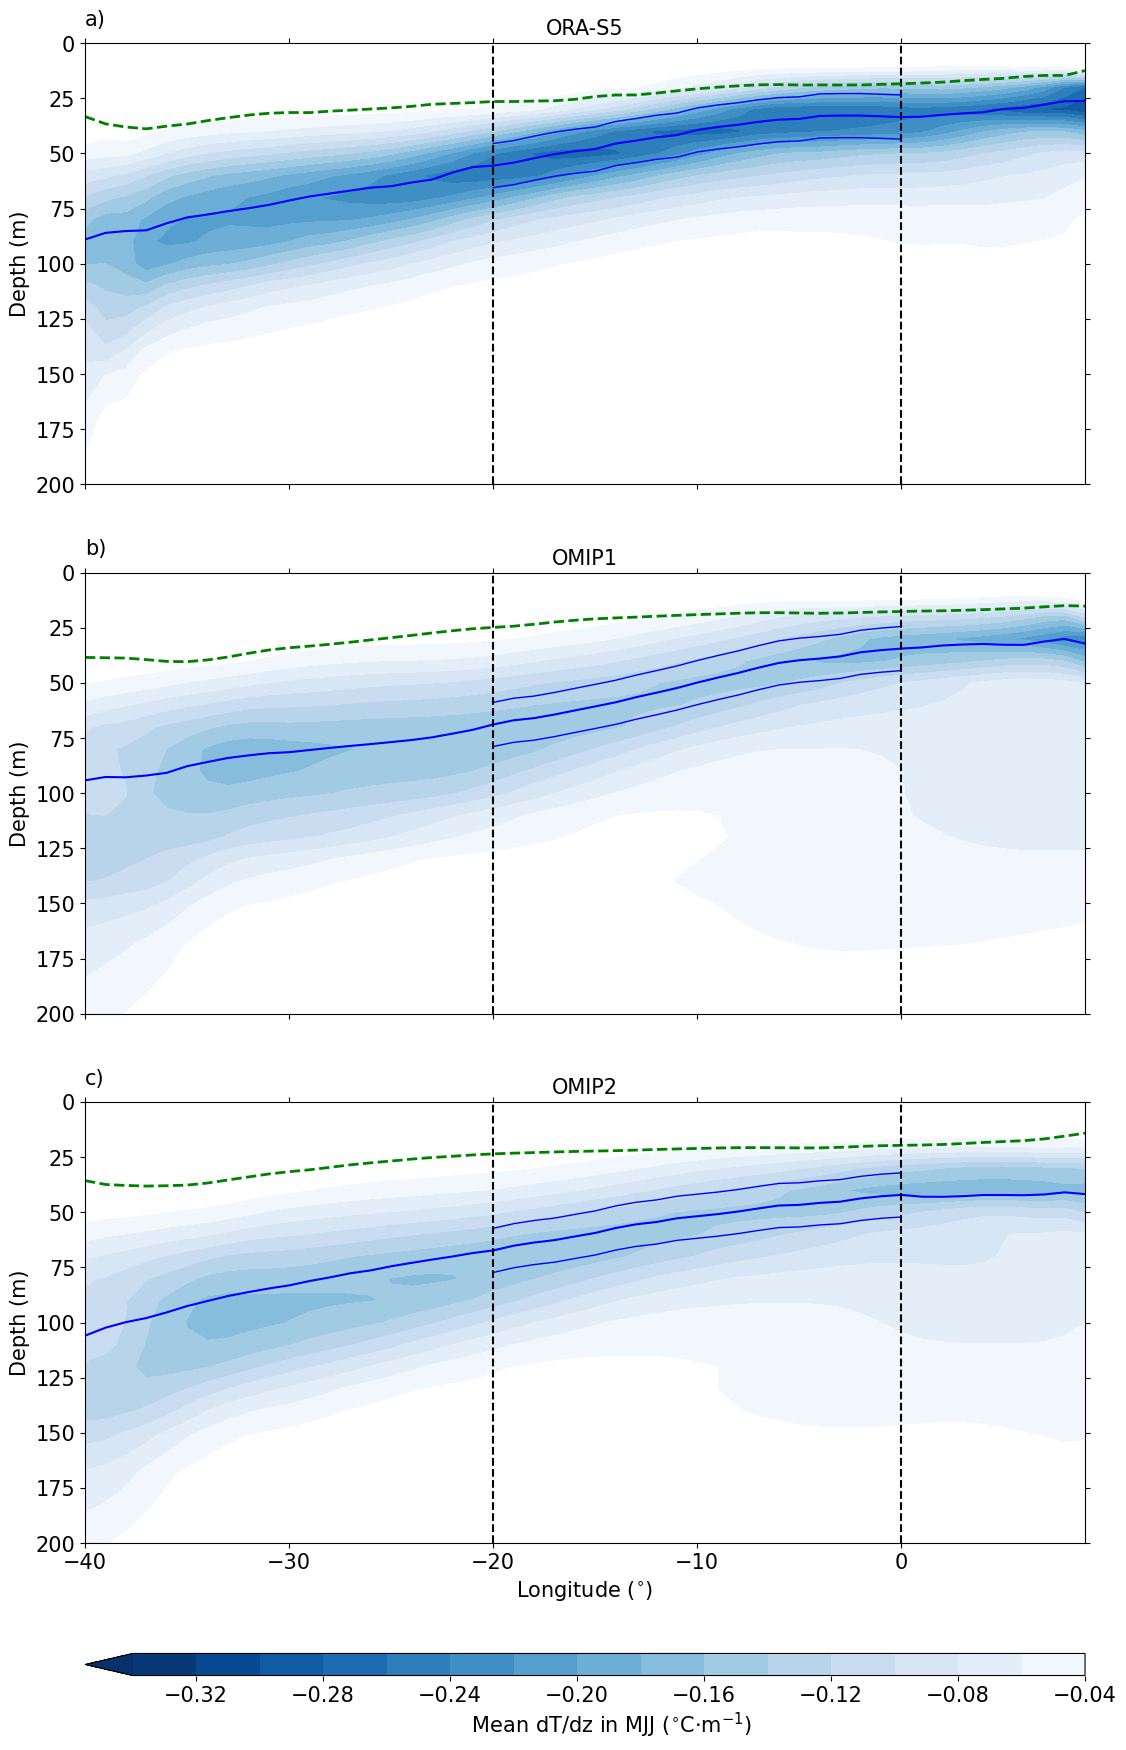

In [11]:
f,ax = plt.subplots(3,1,figsize=[10,15])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.2, wspace=0.05)
cax0 = inset_axes(ax[2],
                 width='100%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[2].transAxes,
                 borderpad=0)

    

## MAM ##
ax[0].set_xlim([-40,9]) 
ax[1].set_xlim([-40,9]) 
ax[2].set_xlim([-40,9]) 


ax[0].axvline(0,color='black',linestyle='--')
ax[0].axvline(-20,color='black',linestyle='--')

p0 = ax[0].contourf(dtdz_eq_oras5_mjj.lon,
               dtdz_eq_oras5_mjj.depth,
               dtdz_eq_oras5_mjj,
               cmap=cmap,
               levels=levels,
               extend='min')


ax[0].plot(dtdzmax_eq_oras5_mjj_atl3.lon,
               dtdzmax_eq_oras5_mjj_atl3-10,color='blue',linewidth=1)
ax[0].plot(dtdzmax_eq_oras5_mjj_atl3.lon,
               dtdzmax_eq_oras5_mjj_atl3+10,color='blue',linewidth=1)

ax[0].plot(dtdzmax_eq_oras5_mjj.lon,
               dtdzmax_eq_oras5_mjj,color='blue')
ax[0].plot(mld_eq_oras5_mjj_mean.lon,mld_eq_oras5_mjj_mean,color='green',linewidth=2,linestyle='--')


ax[0].set_ylabel('Depth (m)',fontsize=ftz)
ax[0].set_ylim([0,200])
ax[0].invert_yaxis()


ax[0].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[0].text(0,1.04,string.ascii_lowercase[0]+')',transform=ax[0].transAxes,size=ftz)
ax[0].set_title('ORA-S5',fontsize=ftz)




## JJA ##


p0 = ax[1].contourf(dtdz_eq_omip1_mjj.lon,
               dtdz_eq_omip1_mjj.depth,
               dtdz_eq_omip1_mjj.mean(dim='model'),
               cmap=cmap,
               levels=levels,
               extend='min')


ax[1].plot(dtdzmax_eq_omip1_mjj_atl3.lon,
               dtdzmax_eq_omip1_mjj_atl3.mean(dim='model')+10,color='blue',linewidth=1)
ax[1].plot(dtdzmax_eq_omip1_mjj_atl3.lon,
               dtdzmax_eq_omip1_mjj_atl3.mean(dim='model')-10,color='blue',linewidth=1)

ax[1].plot(dtdzmax_eq_omip1_mjj.lon,
               dtdzmax_eq_omip1_mjj.mean(dim='model'),color='blue')
ax[1].plot(mld_eq_omip1_mjj.lon,mld_eq_omip1_mjj.mean(dim='model'),color='green',linewidth=2,linestyle='--')
ax[1].axvline(0,color='black',linestyle='--')
ax[1].axvline(-20,color='black',linestyle='--')
ax[1].set_ylabel('Depth (m)',fontsize=ftz)
ax[1].set_ylim([0,200])
ax[1].invert_yaxis()

ax[1].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[1].text(0,1.04,string.ascii_lowercase[1]+')',transform=ax[1].transAxes,size=ftz)

ax[1].set_title('OMIP1',fontsize=ftz)


p0 = ax[2].contourf(dtdz_eq_omip2_mjj.lon,
               dtdz_eq_omip2_mjj.depth,
               dtdz_eq_omip2_mjj.mean(dim='model'),
               cmap=cmap,
               levels=levels,
               extend='min')


ax[2].plot(dtdzmax_eq_omip2_mjj_atl3.lon,
               dtdzmax_eq_omip2_mjj_atl3.mean(dim='model')+10,color='blue',linewidth=1)
ax[2].plot(dtdzmax_eq_omip2_mjj_atl3.lon,
               dtdzmax_eq_omip2_mjj_atl3.mean(dim='model')-10,color='blue',linewidth=1)

ax[2].plot(dtdzmax_eq_omip2_mjj.lon,
               dtdzmax_eq_omip2_mjj.mean(dim='model'),
               color='blue')
ax[2].plot(mld_eq_omip2_mjj.lon,mld_eq_omip2_mjj.mean(dim='model'),
           color='green',linewidth=2,linestyle='--')
ax[2].axvline(0,color='black',linestyle='--')
ax[2].axvline(-20,color='black',linestyle='--')
ax[2].set_ylim([0,200])
ax[2].set_ylabel('Depth (m)',fontsize=ftz)
ax[2].invert_yaxis()
ax[2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[2].text(0,1.04,string.ascii_lowercase[2]+')',transform=ax[2].transAxes,size=ftz)


ax[2].set_title('OMIP2',fontsize=ftz)

cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(' Mean dT/dz in MJJ ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)

ax[2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)

#plt.savefig(path_fig+'figure_S02_ensmean_dtdz_omips.png',bbox_inches='tight',dpi=300)

# All models together

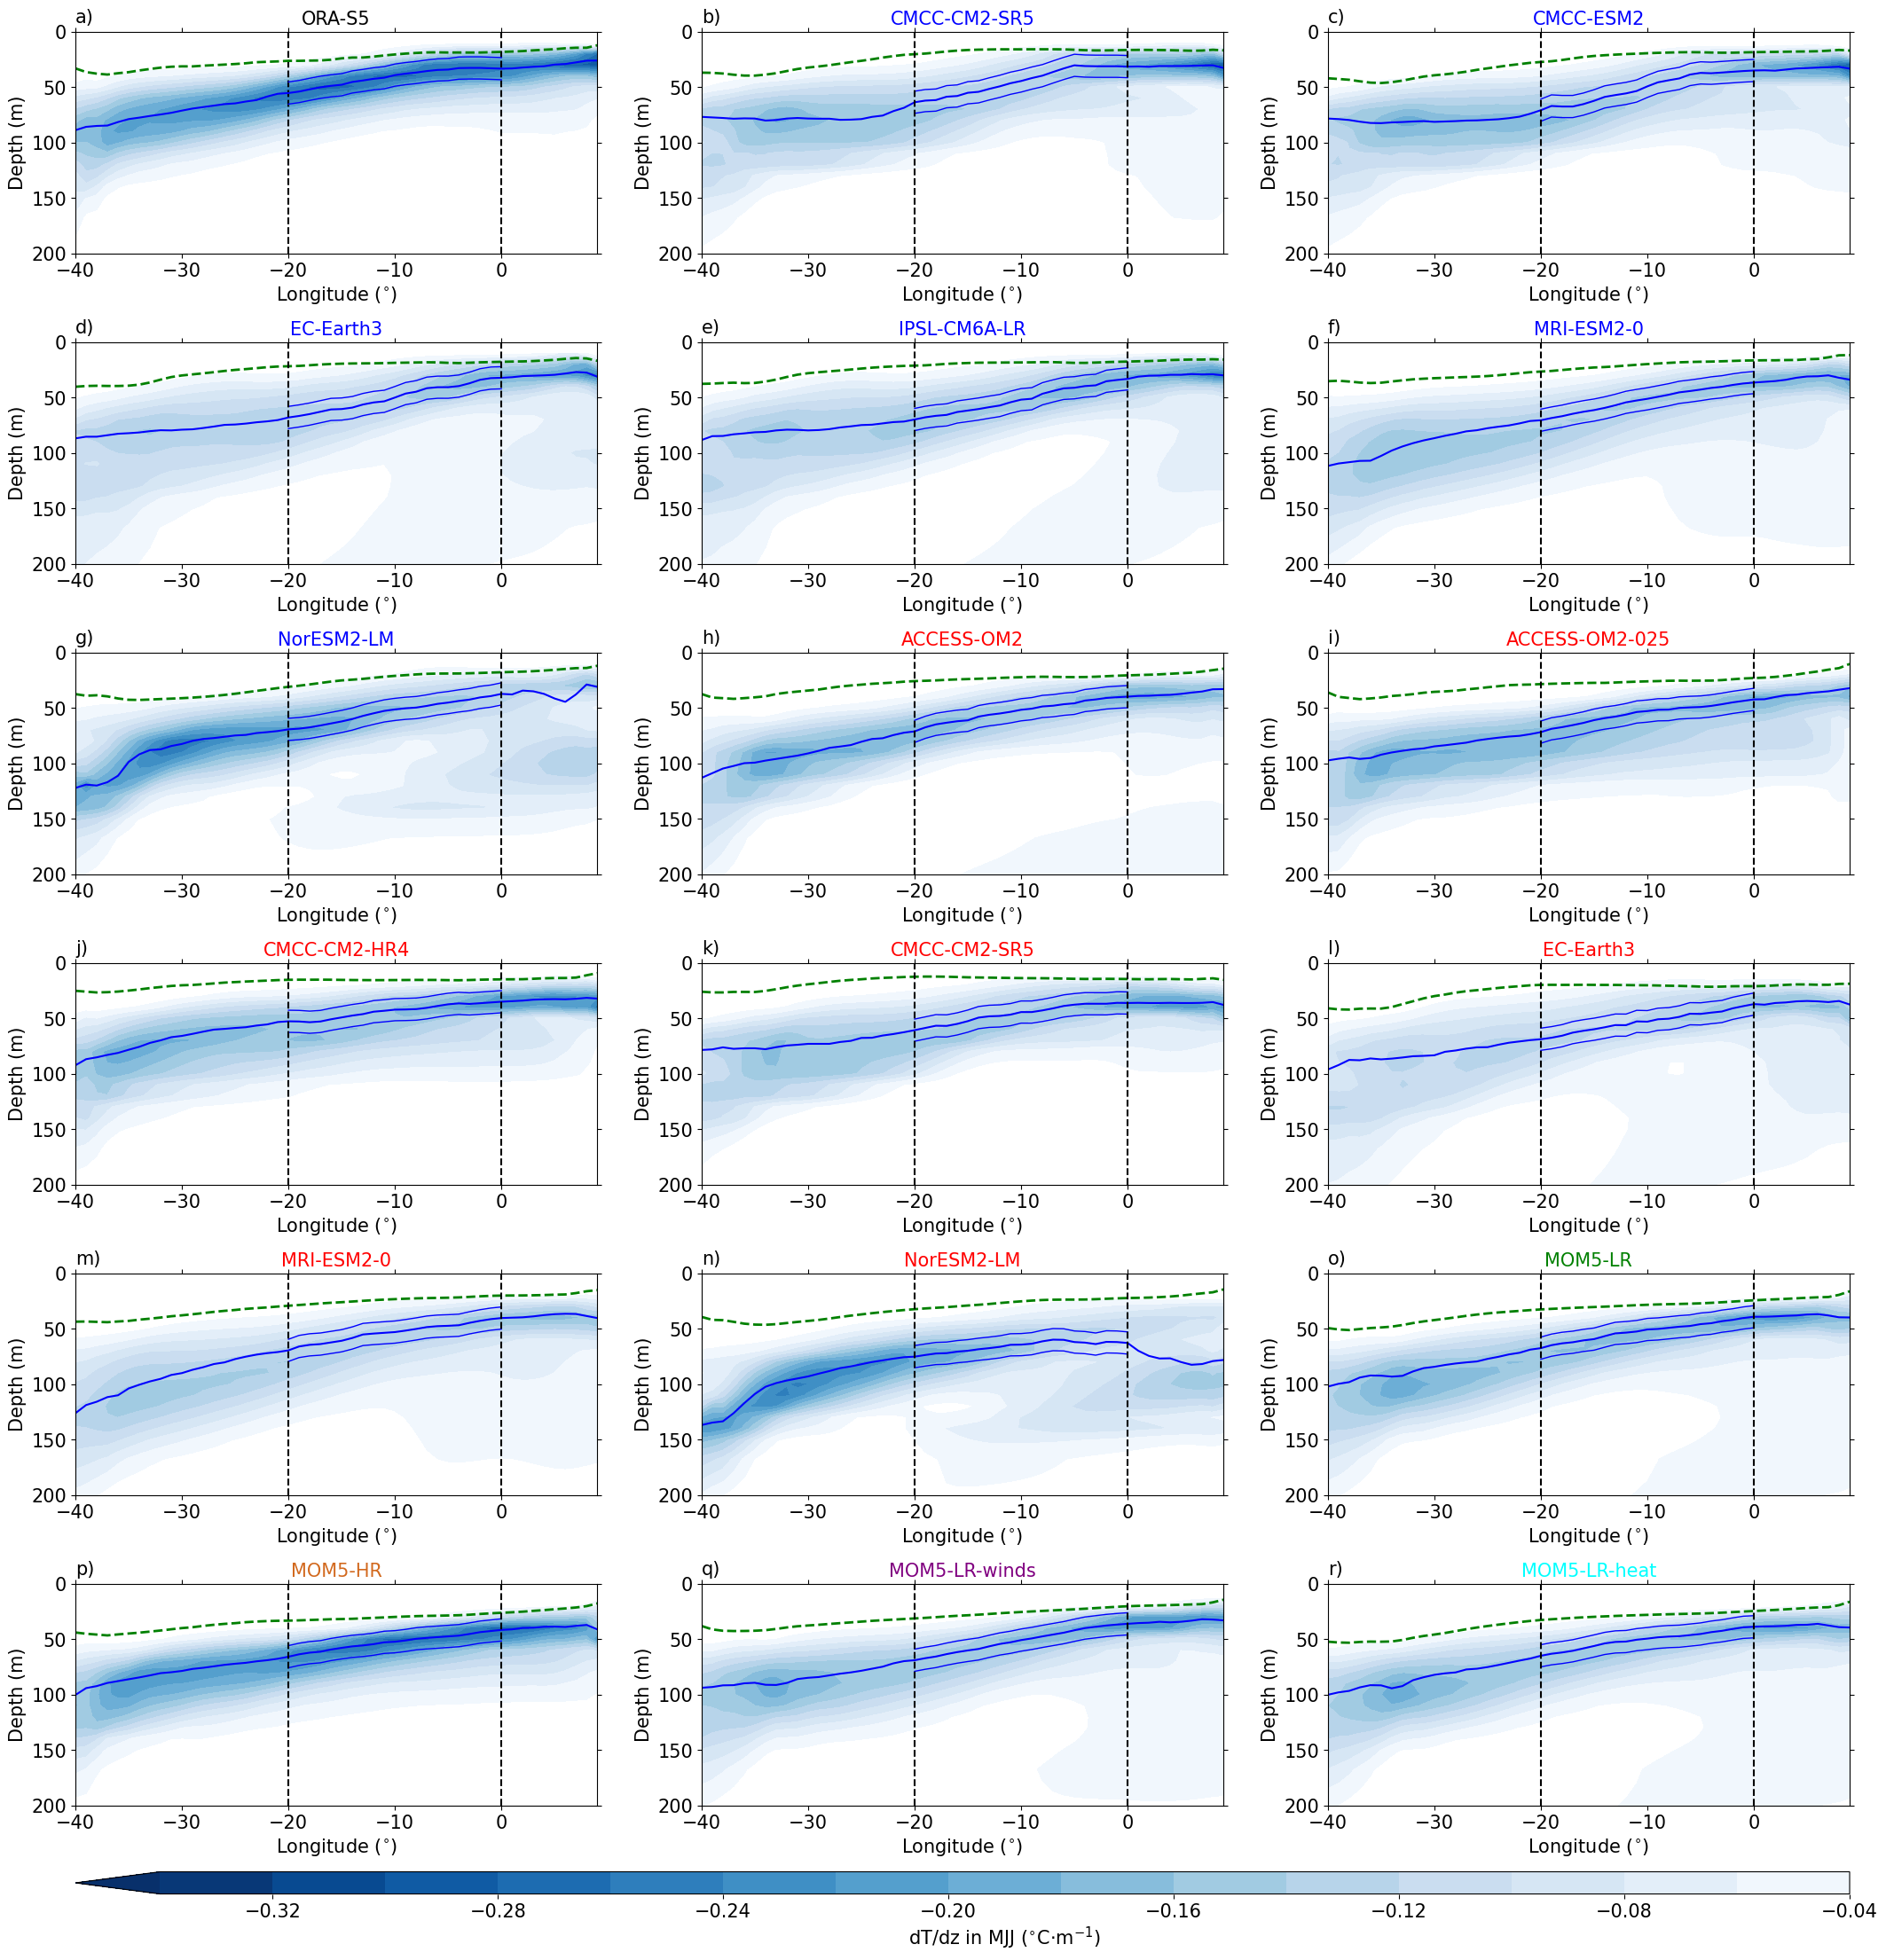

In [12]:
f,ax = plt.subplots(6,3,figsize=[20,20])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.4, wspace=0.2)
cax0 = inset_axes(ax[15],
                 width='340%',
                 height='10%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.4,1,1),
                 bbox_transform=ax[15].transAxes,
                 borderpad=0)

    

## MAM ##
ax[0].set_xlim([-40,9]) 

ax[0].axvline(0,color='black',linestyle='--')
ax[0].axvline(-20,color='black',linestyle='--')

p0 = ax[0].contourf(dtdz_eq_oras5_mjj.lon,
               dtdz_eq_oras5_mjj.depth,
               dtdz_eq_oras5_mjj,
               cmap=cmap,
               levels=levels,
               extend='min')


ax[0].plot(dtdzmax_eq_oras5_mjj_atl3.lon,
               dtdzmax_eq_oras5_mjj_atl3-10,color='blue',linewidth=1)
ax[0].plot(dtdzmax_eq_oras5_mjj_atl3.lon,
               dtdzmax_eq_oras5_mjj_atl3+10,color='blue',linewidth=1)

ax[0].plot(dtdzmax_eq_oras5_mjj.lon,
               dtdzmax_eq_oras5_mjj,color='blue')
ax[0].plot(mld_eq_oras5_mjj_mean.lon,mld_eq_oras5_mjj_mean,color='green',linewidth=2,linestyle='--')

ax[0].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[0].set_ylabel('Depth (m)',fontsize=ftz)
ax[0].set_ylim([0,200])
ax[0].invert_yaxis()


ax[0].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[0].text(0,1.04,string.ascii_lowercase[0]+')',transform=ax[0].transAxes,size=ftz)
ax[0].set_title('ORA-S5',fontsize=ftz)



m = 0
for i in range(1,dtdz_eq_omip1_mjj.shape[0]+1):
    ax[i].set_xlim([-40,9]) 
    p0 = ax[i].contourf(dtdz_eq_omip1_mjj.lon,
                   dtdz_eq_omip1_mjj.depth,
                   dtdz_eq_omip1_mjj[m],
                   cmap=cmap,
                   levels=levels,
                   extend='min')


    ax[i].plot(dtdzmax_eq_omip1_mjj_atl3.lon,
                   dtdzmax_eq_omip1_mjj_atl3[m]+10,color='blue',linewidth=1)
    ax[i].plot(dtdzmax_eq_omip1_mjj_atl3.lon,
                   dtdzmax_eq_omip1_mjj_atl3[m]-10,color='blue',linewidth=1)

    ax[i].plot(dtdzmax_eq_omip1_mjj.lon,
                   dtdzmax_eq_omip1_mjj[m],color='blue')
    ax[i].plot(mld_eq_omip1_mjj.lon,mld_eq_omip1_mjj[m],color='green',linewidth=2,linestyle='--')
    ax[i].axvline(0,color='black',linestyle='--')
    ax[i].axvline(-20,color='black',linestyle='--')
    ax[i].set_ylabel('Depth (m)',fontsize=ftz)
    ax[i].set_ylim([0,200])
    ax[i].invert_yaxis()

    ax[i].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
    ax[i].text(0,1.04,string.ascii_lowercase[i]+')',transform=ax[i].transAxes,size=ftz)
    ax[i].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
    ax[i].set_title(dtdzmax_eq_omip1_mjj.model[m].values,fontsize=ftz,color='blue')
    m+=1

n=0
for j in range(dtdz_eq_omip1_mjj.shape[0]+1,dtdz_eq_omip1_mjj.shape[0]+dtdz_eq_omip2_mjj.shape[0]+1):
    ax[j].set_xlim([-40,9]) 
    p0 = ax[j].contourf(dtdz_eq_omip2_mjj.lon,
                   dtdz_eq_omip2_mjj.depth,
                   dtdz_eq_omip2_mjj[n],
                   cmap=cmap,
                   levels=levels,
                   extend='min')



    ax[j].plot(dtdzmax_eq_omip2_mjj_atl3.lon,
               dtdzmax_eq_omip2_mjj_atl3[n]+10,color='blue',linewidth=1)
    ax[j].plot(dtdzmax_eq_omip2_mjj_atl3.lon,
                   dtdzmax_eq_omip2_mjj_atl3[n]-10,color='blue',linewidth=1)

    ax[j].plot(dtdzmax_eq_omip2_mjj.lon,
                   dtdzmax_eq_omip2_mjj[n],
                   color='blue')
    ax[j].plot(mld_eq_omip2_mjj.lon,mld_eq_omip2_mjj[n],
               color='green',linewidth=2,linestyle='--')
    ax[j].axvline(0,color='black',linestyle='--')
    ax[j].axvline(-20,color='black',linestyle='--')
    ax[j].set_ylim([0,200])
    ax[j].set_ylabel('Depth (m)',fontsize=ftz)
    ax[j].invert_yaxis()
    ax[j].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
    ax[j].text(0,1.04,string.ascii_lowercase[j]+')',transform=ax[j].transAxes,size=ftz)


    ax[j].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
    ax[j].set_title(dtdzmax_eq_omip2_mjj.model[n].values,fontsize=ftz,color='red')


    n+=1
ax[14].set_xlim([-40,9]) 
p0 = ax[14].contourf(dtdz_eq_mom_mjj.lon,
                   dtdz_eq_mom_mjj.depth,
                   dtdz_eq_mom_mjj,
                   cmap=cmap,
                   levels=levels,
                   extend='min')  
ax[14].plot(dtdzmax_eq_mom_mjj_atl3.lon,
       dtdzmax_eq_mom_mjj_atl3+10,color='blue',linewidth=1)
ax[14].plot(dtdzmax_eq_mom_mjj_atl3.lon,
       dtdzmax_eq_mom_mjj_atl3-10,color='blue',linewidth=1)

ax[14].plot(dtdzmax_eq_mom_mjj.lon,
           dtdzmax_eq_mom_mjj,
           color='blue')
ax[14].plot(mld_eq_mom_mjj.lon,mld_eq_mom_mjj,
       color='green',linewidth=2,linestyle='--')
ax[14].axvline(0,color='black',linestyle='--')
ax[14].axvline(-20,color='black',linestyle='--')
ax[14].set_ylim([0,200])
ax[14].set_ylabel('Depth (m)',fontsize=ftz)
ax[14].invert_yaxis()
ax[14].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[14].text(0,1.04,string.ascii_lowercase[14]+')',transform=ax[14].transAxes,size=ftz)
ax[14].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[14].set_title('MOM5-LR',fontsize=ftz,color='green')



ax[15].set_xlim([-40,9]) 
p0 = ax[15].contourf(dtdz_eq_mom025_mjj.lon,
                   dtdz_eq_mom025_mjj.depth,
                   dtdz_eq_mom025_mjj,
                   cmap=cmap,
                   levels=levels,
                   extend='min')  
ax[15].plot(dtdzmax_eq_mom025_mjj_atl3.lon,
       dtdzmax_eq_mom025_mjj_atl3+10,color='blue',linewidth=1)
ax[15].plot(dtdzmax_eq_mom025_mjj_atl3.lon,
       dtdzmax_eq_mom025_mjj_atl3-10,color='blue',linewidth=1)

ax[15].plot(dtdzmax_eq_mom025_mjj.lon,
           dtdzmax_eq_mom025_mjj,
           color='blue')
ax[15].plot(mld_eq_mom025_mjj.lon,mld_eq_mom025_mjj,
       color='green',linewidth=2,linestyle='--')
ax[15].axvline(0,color='black',linestyle='--')
ax[15].axvline(-20,color='black',linestyle='--')
ax[15].set_ylim([0,200])
ax[15].set_ylabel('Depth (m)',fontsize=ftz)
ax[15].invert_yaxis()
ax[15].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[15].text(0,1.04,string.ascii_lowercase[15]+')',transform=ax[15].transAxes,size=ftz)
ax[15].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[15].set_title('MOM5-HR',fontsize=ftz,color='chocolate')



ax[16].set_xlim([-40,9]) 
p0 = ax[16].contourf(dtdz_eq_mom_core2_mjj.lon,
                   dtdz_eq_mom_core2_mjj.depth,
                   dtdz_eq_mom_core2_mjj,
                   cmap=cmap,
                   levels=levels,
                   extend='min')  
ax[16].plot(dtdzmax_eq_mom_core2_mjj_atl3.lon,
       dtdzmax_eq_mom_core2_mjj_atl3+10,color='blue',linewidth=1)
ax[16].plot(dtdzmax_eq_mom_core2_mjj_atl3.lon,
       dtdzmax_eq_mom_core2_mjj_atl3-10,color='blue',linewidth=1)

ax[16].plot(dtdzmax_eq_mom_core2_mjj.lon,
           dtdzmax_eq_mom_core2_mjj,
           color='blue')
ax[16].plot(mld_eq_mom_core2_mjj.lon,mld_eq_mom_core2_mjj,
       color='green',linewidth=2,linestyle='--')
ax[16].axvline(0,color='black',linestyle='--')
ax[16].axvline(-20,color='black',linestyle='--')
ax[16].set_ylim([0,200])
ax[16].set_ylabel('Depth (m)',fontsize=ftz)
ax[16].invert_yaxis()
ax[16].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[16].text(0,1.04,string.ascii_lowercase[16]+')',transform=ax[16].transAxes,size=ftz)
ax[16].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[16].set_title('MOM5-LR-winds',fontsize=ftz,color='purple')



ax[17].set_xlim([-40,9]) 
p0 = ax[17].contourf(dtdz_eq_mom_heat_mjj.lon,
                   dtdz_eq_mom_heat_mjj.depth,
                   dtdz_eq_mom_heat_mjj,
                   cmap=cmap,
                   levels=levels,
                   extend='min')  
ax[17].plot(dtdzmax_eq_mom_heat_mjj_atl3.lon,
       dtdzmax_eq_mom_heat_mjj_atl3+10,color='blue',linewidth=1)
ax[17].plot(dtdzmax_eq_mom_heat_mjj_atl3.lon,
       dtdzmax_eq_mom_heat_mjj_atl3-10,color='blue',linewidth=1)

ax[17].plot(dtdzmax_eq_mom_heat_mjj.lon,
           dtdzmax_eq_mom_heat_mjj,
           color='blue')
ax[17].plot(mld_eq_mom_heat_mjj.lon,mld_eq_mom_heat_mjj,
       color='green',linewidth=2,linestyle='--')
ax[17].axvline(0,color='black',linestyle='--')
ax[17].axvline(-20,color='black',linestyle='--')
ax[17].set_ylim([0,200])
ax[17].set_ylabel('Depth (m)',fontsize=ftz)
ax[17].invert_yaxis()
ax[17].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[17].text(0,1.04,string.ascii_lowercase[17]+')',transform=ax[17].transAxes,size=ftz)
ax[17].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[17].set_title('MOM5-LR-heat',fontsize=ftz,color='cyan')

cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('dT/dz in MJJ ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)

plt.savefig(path_fig+'figure_S03.png',bbox_inches='tight',dpi=300)

### ORA-S5

NameError: name 'dtdz_eq_oras5_seasonal' is not defined

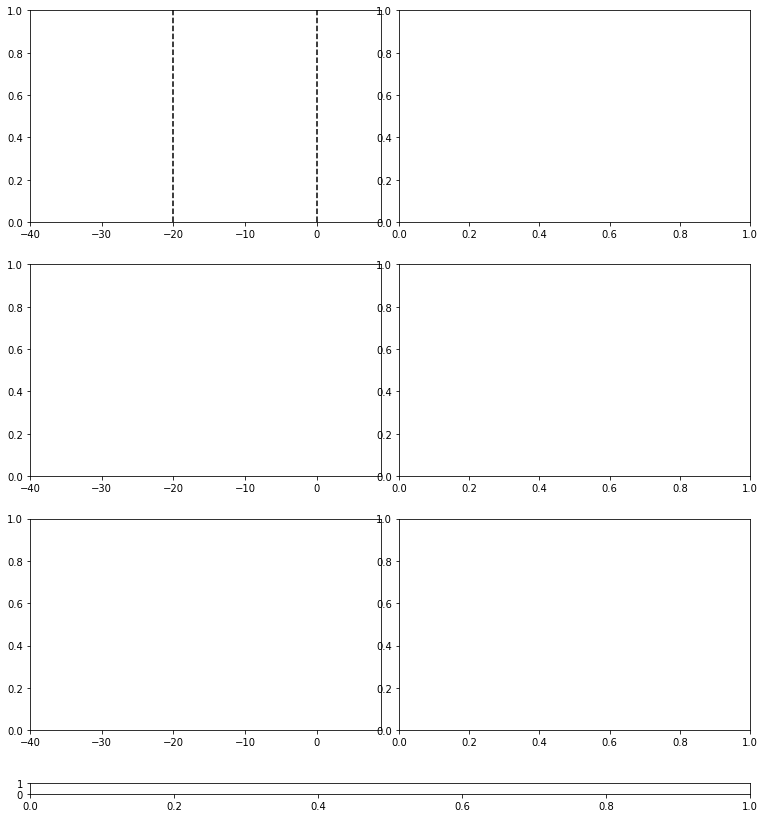

In [12]:
f,ax = plt.subplots(3,2,figsize=[10,10])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.2, wspace=0.05)
cax0 = inset_axes(ax[4],
                 width='205%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[4].transAxes,
                 borderpad=0)

    


## MAM ##
ax[0].set_xlim([-40,9]) 
ax[2].set_xlim([-40,9]) 
ax[4].set_xlim([-40,9]) 
ax[0].axvline(0,color='black',linestyle='--')
ax[0].axvline(-20,color='black',linestyle='--')

p0 = ax[0].contourf(dtdz_eq_oras5_seasonal.lon,
               dtdz_eq_oras5_seasonal.depth,
               dtdz_eq_oras5_seasonal[2,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[0].contour(thetao_eq_oras5_seasonal.lon,
               thetao_eq_oras5_seasonal.depth,
               thetao_eq_oras5_seasonal[2,:,:],
               colors='black',
               levels=[20])



p0 = ax[1].contourf(dtdz_af_oras5_seasonal.lat,
               dtdz_af_oras5_seasonal.depth,
               dtdz_af_oras5_seasonal[2,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[1].contour(thetao_af_oras5_seasonal.lat,
               thetao_af_oras5_seasonal.depth,
               thetao_af_oras5_seasonal[2,:,:],
               colors='black',
               levels=[20])
ax[1].axvline(-10,color='black',linestyle='--')
ax[1].axvline(-20,color='black',linestyle='--')


ax[0].set_ylabel('Depth (m)',fontsize=ftz)

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[1].invert_xaxis()
ax[0].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[0].text(0,1.04,string.ascii_lowercase[0]+')',transform=ax[0].transAxes,size=ftz)


ax[0].text(1.026,1.06,'MAM',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[0].transAxes)




## JJA ##


p0 = ax[2].contourf(dtdz_eq_oras5_seasonal.lon,
               dtdz_eq_oras5_seasonal.depth,
               dtdz_eq_oras5_seasonal[1,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[2].contour(thetao_eq_oras5_seasonal.lon,
               thetao_eq_oras5_seasonal.depth,
               thetao_eq_oras5_seasonal[1,:,:],
               colors='black',
               levels=[20])

p0 = ax[3].contourf(dtdz_af_oras5_seasonal.lat,
               dtdz_af_oras5_seasonal.depth,
               dtdz_af_oras5_seasonal[1,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[3].contour(thetao_af_oras5_seasonal.lat,
               thetao_af_oras5_seasonal.depth,
               thetao_af_oras5_seasonal[1,:,:],
               colors='black',
               levels=[20])
ax[2].axvline(0,color='black',linestyle='--')
ax[2].axvline(-20,color='black',linestyle='--')

ax[3].axvline(-10,color='black',linestyle='--')
ax[3].axvline(-20,color='black',linestyle='--')

ax[2].set_ylabel('Depth (m)',fontsize=ftz)

ax[2].invert_yaxis()
ax[3].invert_yaxis()
ax[3].invert_xaxis()
ax[2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[3].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[2].text(0,1.04,string.ascii_lowercase[1]+')',transform=ax[2].transAxes,size=ftz)


ax[2].text(1.026,1.06,'JJA',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[2].transAxes)




p0 = ax[4].contourf(dtdz_eq_oras5_seasonal.lon,
               dtdz_eq_oras5_seasonal.depth,
               dtdz_eq_oras5_nd_mean,
               cmap=cmap,
               levels=levels,
               extend='min')

ax[4].contour(thetao_eq_oras5_nd_mean.lon,
               thetao_eq_oras5_nd_mean.depth,
               thetao_eq_oras5_nd_mean,
               colors='black',
               levels=[20])

ax[4].axvline(0,color='black',linestyle='--')
ax[4].axvline(-20,color='black',linestyle='--')

p0 = ax[5].contourf(dtdz_af_oras5_nd_mean.lat,
               dtdz_af_oras5_nd_mean.depth,
               dtdz_af_oras5_nd_mean,
               cmap=cmap,
               levels=levels,
               extend='min')

ax[5].contour(thetao_af_oras5_nd_mean.lat,
               thetao_af_oras5_nd_mean.depth,
               thetao_af_oras5_nd_mean,
               colors='black',
               levels=[20])
ax[5].axvline(-10,color='black',linestyle='--')
ax[5].axvline(-20,color='black',linestyle='--')

ax[4].set_ylabel('Depth (m)',fontsize=ftz)

ax[4].invert_yaxis()
ax[5].invert_yaxis()
ax[5].invert_xaxis()
ax[4].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[5].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[4].text(0,1.04,string.ascii_lowercase[2]+')',transform=ax[4].transAxes,size=ftz)


ax[4].text(1.026,1.06,'ND',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[4].transAxes)

ax[4].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[5].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)




cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('dT/dz ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)

plt.savefig(path_fig+'figure_07_ensmean_oras5_dtdz.png',bbox_inches='tight',dpi=300)

### ORA-S4

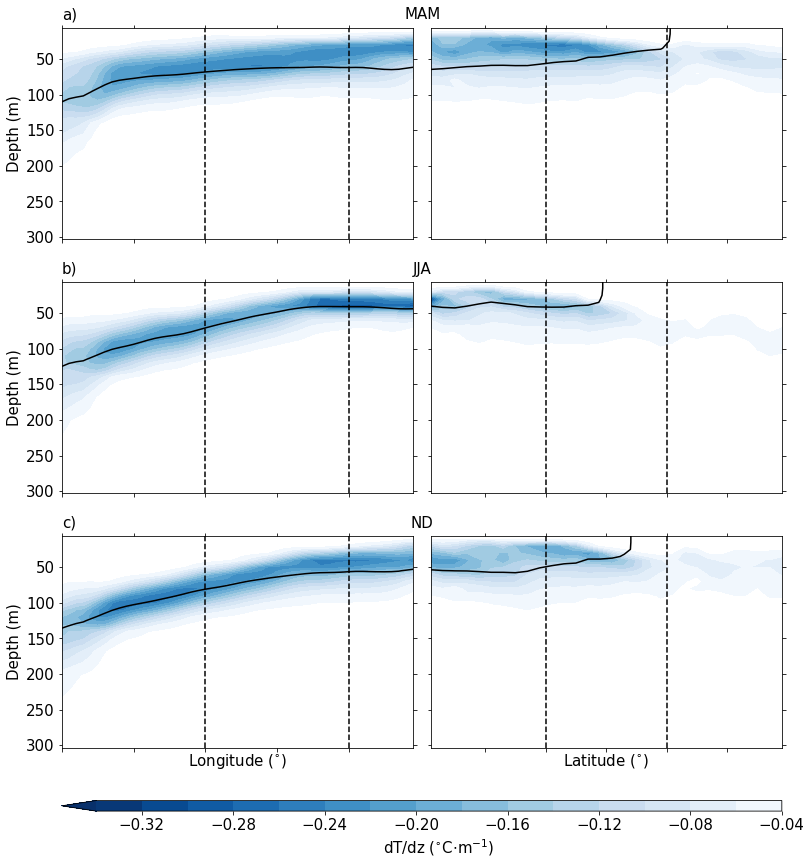

In [12]:
f,ax = plt.subplots(3,2,figsize=[10,10])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.2, wspace=0.05)
cax0 = inset_axes(ax[4],
                 width='205%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[4].transAxes,
                 borderpad=0)

    


## MAM ##
ax[0].set_xlim([-40,9]) 
ax[2].set_xlim([-40,9]) 
ax[4].set_xlim([-40,9]) 
ax[0].axvline(0,color='black',linestyle='--')
ax[0].axvline(-20,color='black',linestyle='--')

p0 = ax[0].contourf(dtdz_eq_oras4_seasonal.lon,
               dtdz_eq_oras4_seasonal.depth,
               dtdz_eq_oras4_seasonal[2,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[0].contour(thetao_eq_oras4_seasonal.lon,
               thetao_eq_oras4_seasonal.depth,
               thetao_eq_oras4_seasonal[2,:,:],
               colors='black',
               levels=[20])



p0 = ax[1].contourf(dtdz_af_oras4_seasonal.lat,
               dtdz_af_oras4_seasonal.depth,
               dtdz_af_oras4_seasonal[2,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[1].contour(thetao_af_oras4_seasonal.lat,
               thetao_af_oras4_seasonal.depth,
               thetao_af_oras4_seasonal[2,:,:],
               colors='black',
               levels=[20])
ax[1].axvline(-10,color='black',linestyle='--')
ax[1].axvline(-20,color='black',linestyle='--')


ax[0].set_ylabel('Depth (m)',fontsize=ftz)

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[1].invert_xaxis()
ax[0].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[0].text(0,1.04,string.ascii_lowercase[0]+')',transform=ax[0].transAxes,size=ftz)


ax[0].text(1.026,1.06,'MAM',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[0].transAxes)




## JJA ##


p0 = ax[2].contourf(dtdz_eq_oras4_seasonal.lon,
               dtdz_eq_oras4_seasonal.depth,
               dtdz_eq_oras4_seasonal[1,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[2].contour(thetao_eq_oras4_seasonal.lon,
               thetao_eq_oras4_seasonal.depth,
               thetao_eq_oras4_seasonal[1,:,:],
               colors='black',
               levels=[20])

p0 = ax[3].contourf(dtdz_af_oras4_seasonal.lat,
               dtdz_af_oras4_seasonal.depth,
               dtdz_af_oras4_seasonal[1,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[3].contour(thetao_af_oras4_seasonal.lat,
               thetao_af_oras4_seasonal.depth,
               thetao_af_oras4_seasonal[1,:,:],
               colors='black',
               levels=[20])
ax[2].axvline(0,color='black',linestyle='--')
ax[2].axvline(-20,color='black',linestyle='--')

ax[3].axvline(-10,color='black',linestyle='--')
ax[3].axvline(-20,color='black',linestyle='--')

ax[2].set_ylabel('Depth (m)',fontsize=ftz)

ax[2].invert_yaxis()
ax[3].invert_yaxis()
ax[3].invert_xaxis()
ax[2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[3].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[2].text(0,1.04,string.ascii_lowercase[1]+')',transform=ax[2].transAxes,size=ftz)


ax[2].text(1.026,1.06,'JJA',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[2].transAxes)




p0 = ax[4].contourf(dtdz_eq_oras4_seasonal.lon,
               dtdz_eq_oras4_seasonal.depth,
               dtdz_eq_oras4_nd_mean,
               cmap=cmap,
               levels=levels,
               extend='min')

ax[4].contour(thetao_eq_oras4_nd_mean.lon,
               thetao_eq_oras4_nd_mean.depth,
               thetao_eq_oras4_nd_mean,
               colors='black',
               levels=[20])

ax[4].axvline(0,color='black',linestyle='--')
ax[4].axvline(-20,color='black',linestyle='--')

p0 = ax[5].contourf(dtdz_af_oras4_nd_mean.lat,
               dtdz_af_oras4_nd_mean.depth,
               dtdz_af_oras4_nd_mean,
               cmap=cmap,
               levels=levels,
               extend='min')

ax[5].contour(thetao_af_oras4_nd_mean.lat,
               thetao_af_oras4_nd_mean.depth,
               thetao_af_oras4_nd_mean,
               colors='black',
               levels=[20])
ax[5].axvline(-10,color='black',linestyle='--')
ax[5].axvline(-20,color='black',linestyle='--')

ax[4].set_ylabel('Depth (m)',fontsize=ftz)

ax[4].invert_yaxis()
ax[5].invert_yaxis()
ax[5].invert_xaxis()
ax[4].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[5].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[4].text(0,1.04,string.ascii_lowercase[2]+')',transform=ax[4].transAxes,size=ftz)


ax[4].text(1.026,1.06,'ND',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[4].transAxes)

ax[4].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[5].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)




cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('dT/dz ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)

plt.savefig(path_fig+'figure_07_ensmean_oras4_dtdz.png',bbox_inches='tight',dpi=300)

### MOM-JRA55

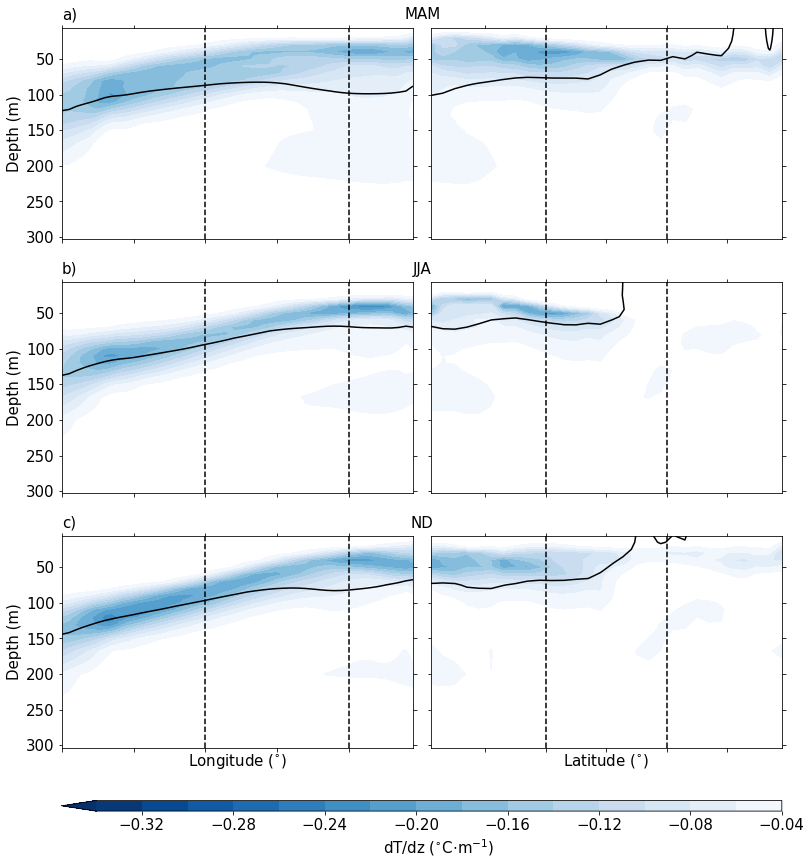

In [14]:
f,ax = plt.subplots(3,2,figsize=[10,10])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.2, wspace=0.05)
cax0 = inset_axes(ax[4],
                 width='205%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[4].transAxes,
                 borderpad=0)

    


## MAM ##
ax[0].set_xlim([-40,9]) 
ax[2].set_xlim([-40,9]) 
ax[4].set_xlim([-40,9]) 
ax[0].axvline(0,color='black',linestyle='--')
ax[0].axvline(-20,color='black',linestyle='--')

p0 = ax[0].contourf(dtdz_eq_mom_seasonal.lon,
               dtdz_eq_mom_seasonal.depth,
               dtdz_eq_mom_seasonal[2,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[0].contour(thetao_eq_mom_seasonal.lon,
               thetao_eq_mom_seasonal.depth,
               thetao_eq_mom_seasonal[2,:,:],
               colors='black',
               levels=[20])



p0 = ax[1].contourf(dtdz_af_mom_seasonal.lat,
               dtdz_af_mom_seasonal.depth,
               dtdz_af_mom_seasonal[2,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[1].contour(thetao_af_mom_seasonal.lat,
               thetao_af_mom_seasonal.depth,
               thetao_af_mom_seasonal[2,:,:],
               colors='black',
               levels=[20])
ax[1].axvline(-10,color='black',linestyle='--')
ax[1].axvline(-20,color='black',linestyle='--')


ax[0].set_ylabel('Depth (m)',fontsize=ftz)

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[1].invert_xaxis()
ax[0].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[0].text(0,1.04,string.ascii_lowercase[0]+')',transform=ax[0].transAxes,size=ftz)


ax[0].text(1.026,1.06,'MAM',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[0].transAxes)




## JJA ##


p0 = ax[2].contourf(dtdz_eq_mom_seasonal.lon,
               dtdz_eq_mom_seasonal.depth,
               dtdz_eq_mom_seasonal[1,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[2].contour(thetao_eq_mom_seasonal.lon,
               thetao_eq_mom_seasonal.depth,
               thetao_eq_mom_seasonal[1,:,:],
               colors='black',
               levels=[20])

p0 = ax[3].contourf(dtdz_af_mom_seasonal.lat,
               dtdz_af_mom_seasonal.depth,
               dtdz_af_mom_seasonal[1,:,:],
               cmap=cmap,
               levels=levels,
               extend='min')

ax[3].contour(thetao_af_mom_seasonal.lat,
               thetao_af_mom_seasonal.depth,
               thetao_af_mom_seasonal[1,:,:],
               colors='black',
               levels=[20])
ax[2].axvline(0,color='black',linestyle='--')
ax[2].axvline(-20,color='black',linestyle='--')

ax[3].axvline(-10,color='black',linestyle='--')
ax[3].axvline(-20,color='black',linestyle='--')

ax[2].set_ylabel('Depth (m)',fontsize=ftz)

ax[2].invert_yaxis()
ax[3].invert_yaxis()
ax[3].invert_xaxis()
ax[2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[3].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[2].text(0,1.04,string.ascii_lowercase[1]+')',transform=ax[2].transAxes,size=ftz)


ax[2].text(1.026,1.06,'JJA',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[2].transAxes)




p0 = ax[4].contourf(dtdz_eq_mom_seasonal.lon,
               dtdz_eq_mom_seasonal.depth,
               dtdz_eq_mom_nd_mean,
               cmap=cmap,
               levels=levels,
               extend='min')

ax[4].contour(thetao_eq_mom_nd_mean.lon,
               thetao_eq_mom_nd_mean.depth,
               thetao_eq_mom_nd_mean,
               colors='black',
               levels=[20])

ax[4].axvline(0,color='black',linestyle='--')
ax[4].axvline(-20,color='black',linestyle='--')

p0 = ax[5].contourf(dtdz_af_mom_nd_mean.lat,
               dtdz_af_mom_nd_mean.depth,
               dtdz_af_mom_nd_mean,
               cmap=cmap,
               levels=levels,
               extend='min')

ax[5].contour(thetao_af_mom_nd_mean.lat,
               thetao_af_mom_nd_mean.depth,
               thetao_af_mom_nd_mean,
               colors='black',
               levels=[20])
ax[5].axvline(-10,color='black',linestyle='--')
ax[5].axvline(-20,color='black',linestyle='--')

ax[4].set_ylabel('Depth (m)',fontsize=ftz)

ax[4].invert_yaxis()
ax[5].invert_yaxis()
ax[5].invert_xaxis()
ax[4].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=False)
ax[5].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                    labelright=False,labeltop=False,labelbottom=False)
ax[4].text(0,1.04,string.ascii_lowercase[2]+')',transform=ax[4].transAxes,size=ftz)


ax[4].text(1.026,1.06,'ND',size=ftz, horizontalalignment='center',
           verticalalignment='center', transform=ax[4].transAxes)

ax[4].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[5].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)




cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('dT/dz ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)

plt.savefig(path_fig+'figure_07_ensmean_mom_dtdz.png',bbox_inches='tight',dpi=300)

# Figure

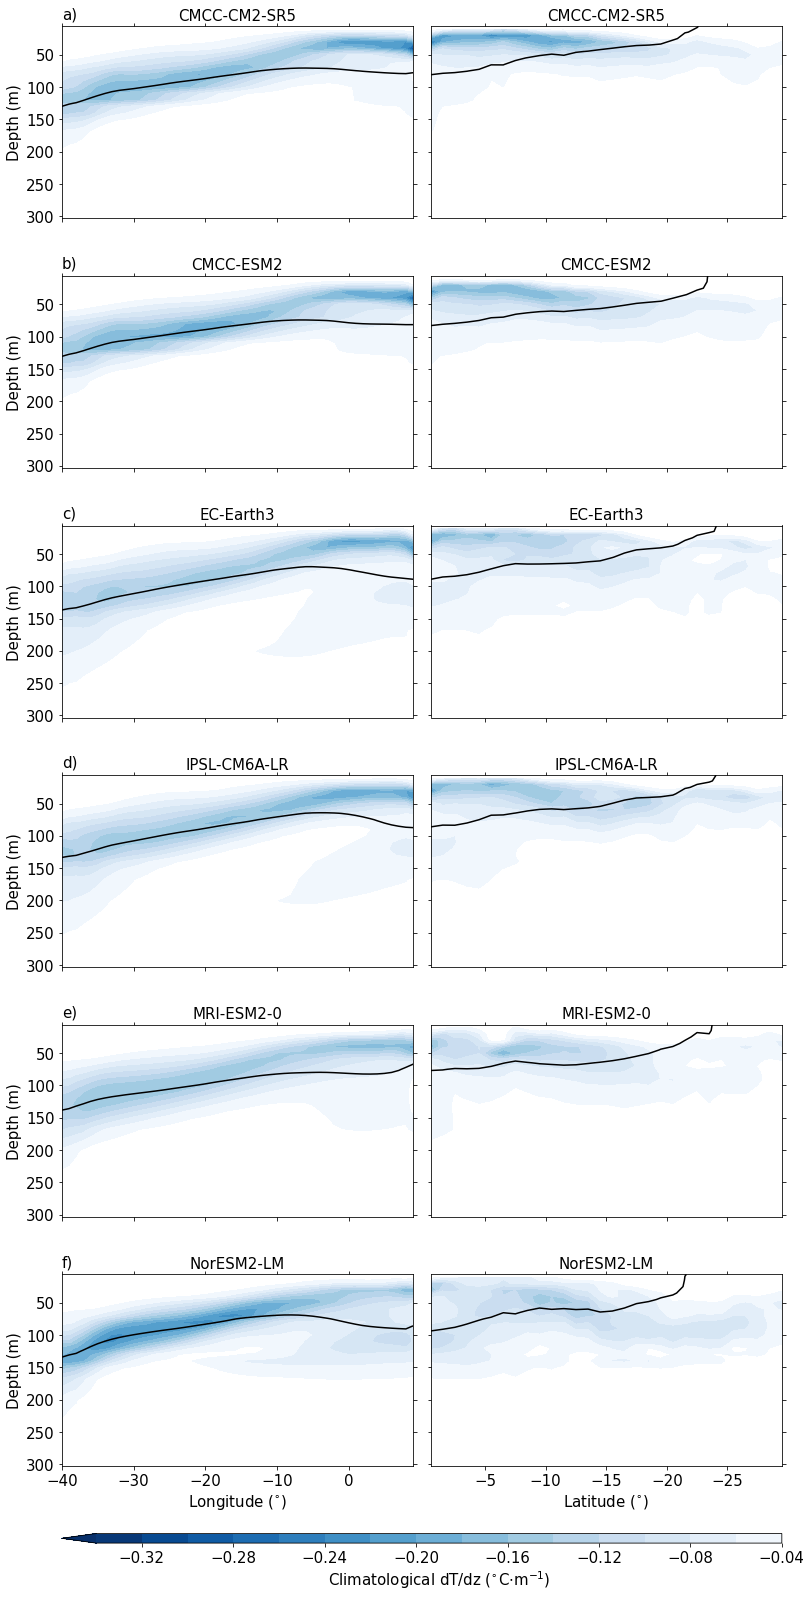

In [13]:
f,ax = plt.subplots(6,2,figsize=[10,20])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.3, wspace=0.05)
cax0 = inset_axes(ax[-2],
                 width='205%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.4,1,1),
                 bbox_transform=ax[-2].transAxes,
                 borderpad=0)
index= np.arange(0,len(ax),2)
n=0
for i in index:
    
    p0 = ax[i].contourf(dtdz_eq_all.lon,
                   dtdz_eq_all.depth,
                   dtdz_eq_all.dtdz.mean(dim='time')[n,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    ax[i].set_xlim([-40,9])
    
    ax[i].contour(thetao_eq_all.lon,
                   thetao_eq_all.depth,
                   thetao_eq_all.temp.mean(dim='time')[n,:,:],
                   colors='black',
                   levels=[20])
    
    p0 = ax[i+1].contourf(dtdz_af_all.lat,
                   dtdz_af_all.depth,
                   dtdz_af_all.dtdz.mean(dim='time')[n,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    
    ax[i+1].contour(thetao_af_all.lat,
                   thetao_af_all.depth,
                   thetao_af_all.temp.mean(dim='time')[n,:,:],
                   colors='black',
                   levels=[20])
    
    ax[i].set_title(omip1_models[n],fontsize=ftz)
    ax[i].set_ylabel('Depth (m)',fontsize=ftz)
    ax[i+1].set_title(omip1_models[n],fontsize=ftz)
    ax[i].invert_yaxis()
    ax[i+1].invert_yaxis()
    ax[i+1].invert_xaxis()
    ax[i].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=False)
    ax[i+1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=False)
    ax[i].text(0,1.04,string.ascii_lowercase[n]+')',transform=ax[i].transAxes,size=ftz)
    #ax[i+1].text(0,1.02,string.ascii_lowercase[i+1]+')',transform=ax[i+1].transAxes,size=ftz)
    n +=1
    
    
ax[-2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[-2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[-1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=True)
ax[-1].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)
cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Climatological dT/dz ($^{\circ}$C$\cdot$m$^{-1}$)',fontsize=ftz)

plt.savefig(path_fig+'figure_07_dtdz_omip1.png',bbox_inches='tight',dpi=300)

# Figure JJA

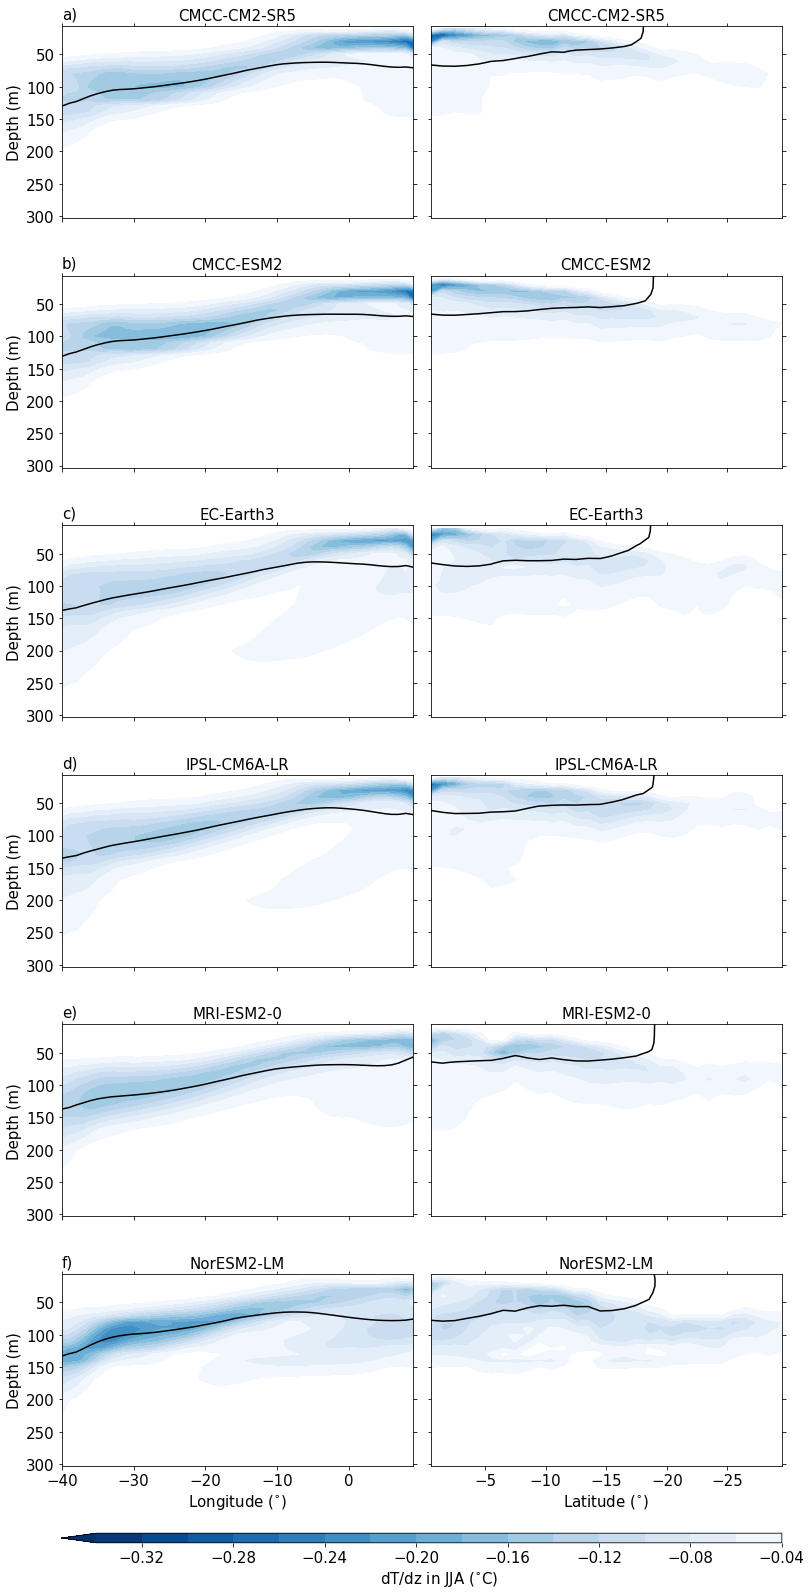

In [14]:
f,ax = plt.subplots(6,2,figsize=[10,20])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.3, wspace=0.05)
cax0 = inset_axes(ax[-2],
                 width='205%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.4,1,1),
                 bbox_transform=ax[-2].transAxes,
                 borderpad=0)
index= np.arange(0,len(ax),2)
n=0
for i in index:
    
    p0 = ax[i].contourf(dtdz_eq_all_seasonal_mean.lon,
                   dtdz_eq_all_seasonal_mean.depth,
                   dtdz_eq_all_seasonal[n,1,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    ax[i].set_xlim([-40,9])
    
    ax[i].contour(thetao_eq_all.lon,
                   thetao_eq_all.depth,
                   thetao_eq_all_seasonal[n,1,:,:],
                   colors='black',
                   levels=[20])
    
    p0 = ax[i+1].contourf(dtdz_af_all_seasonal_mean.lat,
                   dtdz_af_all_seasonal_mean.depth,
                   dtdz_af_all_seasonal[n,1,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    
    ax[i+1].contour(thetao_af_all.lat,
                   thetao_af_all.depth,
                   thetao_af_all_seasonal[n,1,:,:],
                   colors='black',
                   levels=[20])
    
    ax[i].set_title(omip1_models[n],fontsize=ftz)
    ax[i].set_ylabel('Depth (m)',fontsize=ftz)
    ax[i+1].set_title(omip1_models[n],fontsize=ftz)
    ax[i].invert_yaxis()
    ax[i+1].invert_yaxis()
    ax[i+1].invert_xaxis()
    ax[i].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=False)
    ax[i+1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=False)
    ax[i].text(0,1.04,string.ascii_lowercase[n]+')',transform=ax[i].transAxes,size=ftz)
    #ax[i+1].text(0,1.02,string.ascii_lowercase[i+1]+')',transform=ax[i+1].transAxes,size=ftz)
    n +=1
    
    
ax[-2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[-2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[-1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=True)
ax[-1].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)
cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('dT/dz in JJA ($^{\circ}$C)',fontsize=ftz)     

plt.savefig(path_fig+'figure_07_JJA_dtdz_omip1.png',bbox_inches='tight',dpi=300)

# Figure in MAM

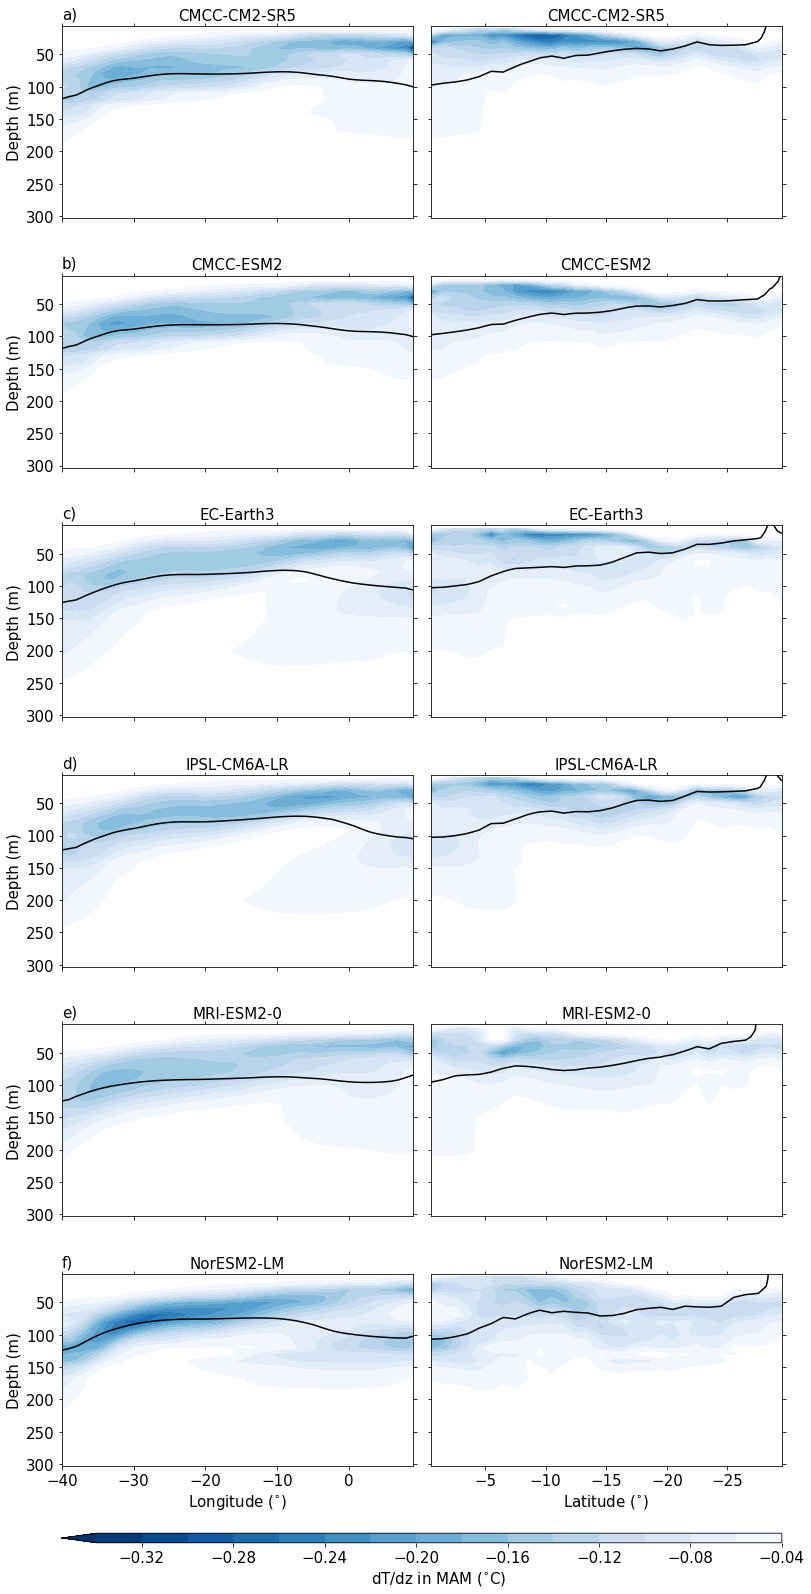

In [15]:
f,ax = plt.subplots(6,2,figsize=[10,20])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.3, wspace=0.05)
cax0 = inset_axes(ax[-2],
                 width='205%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.4,1,1),
                 bbox_transform=ax[-2].transAxes,
                 borderpad=0)
index= np.arange(0,len(ax),2)
n=0
for i in index:
    
    p0 = ax[i].contourf(dtdz_eq_all_seasonal.lon,
                   dtdz_eq_all_seasonal.depth,
                   dtdz_eq_all_seasonal[n,2,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    ax[i].set_xlim([-40,9])
    
    ax[i].contour(thetao_eq_all.lon,
                   thetao_eq_all.depth,
                   thetao_eq_all_seasonal[n,2,:,:],
                   colors='black',
                   levels=[20])
    
    p0 = ax[i+1].contourf(dtdz_af_all_seasonal.lat,
                   dtdz_af_all_seasonal.depth,
                   dtdz_af_all_seasonal[n,2,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    
    ax[i+1].contour(thetao_af_all.lat,
                   thetao_af_all.depth,
                   thetao_af_all_seasonal[n,2,:,:],
                   colors='black',
                   levels=[20])
    
    ax[i].set_title(omip1_models[n],fontsize=ftz)
    ax[i].set_ylabel('Depth (m)',fontsize=ftz)
    ax[i+1].set_title(omip1_models[n],fontsize=ftz)
    ax[i].invert_yaxis()
    ax[i+1].invert_yaxis()
    ax[i+1].invert_xaxis()
    ax[i].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=False)
    ax[i+1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=False)
    ax[i].text(0,1.04,string.ascii_lowercase[n]+')',transform=ax[i].transAxes,size=ftz)
    #ax[i+1].text(0,1.02,string.ascii_lowercase[i+1]+')',transform=ax[i+1].transAxes,size=ftz)
    n +=1
    
    
ax[-2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[-2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[-1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=True)
ax[-1].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)
cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('dT/dz in MAM ($^{\circ}$C)',fontsize=ftz)   
plt.savefig(path_fig+'figure_07_MAM_dtdz_omip1.png',bbox_inches='tight',dpi=300)

# ND

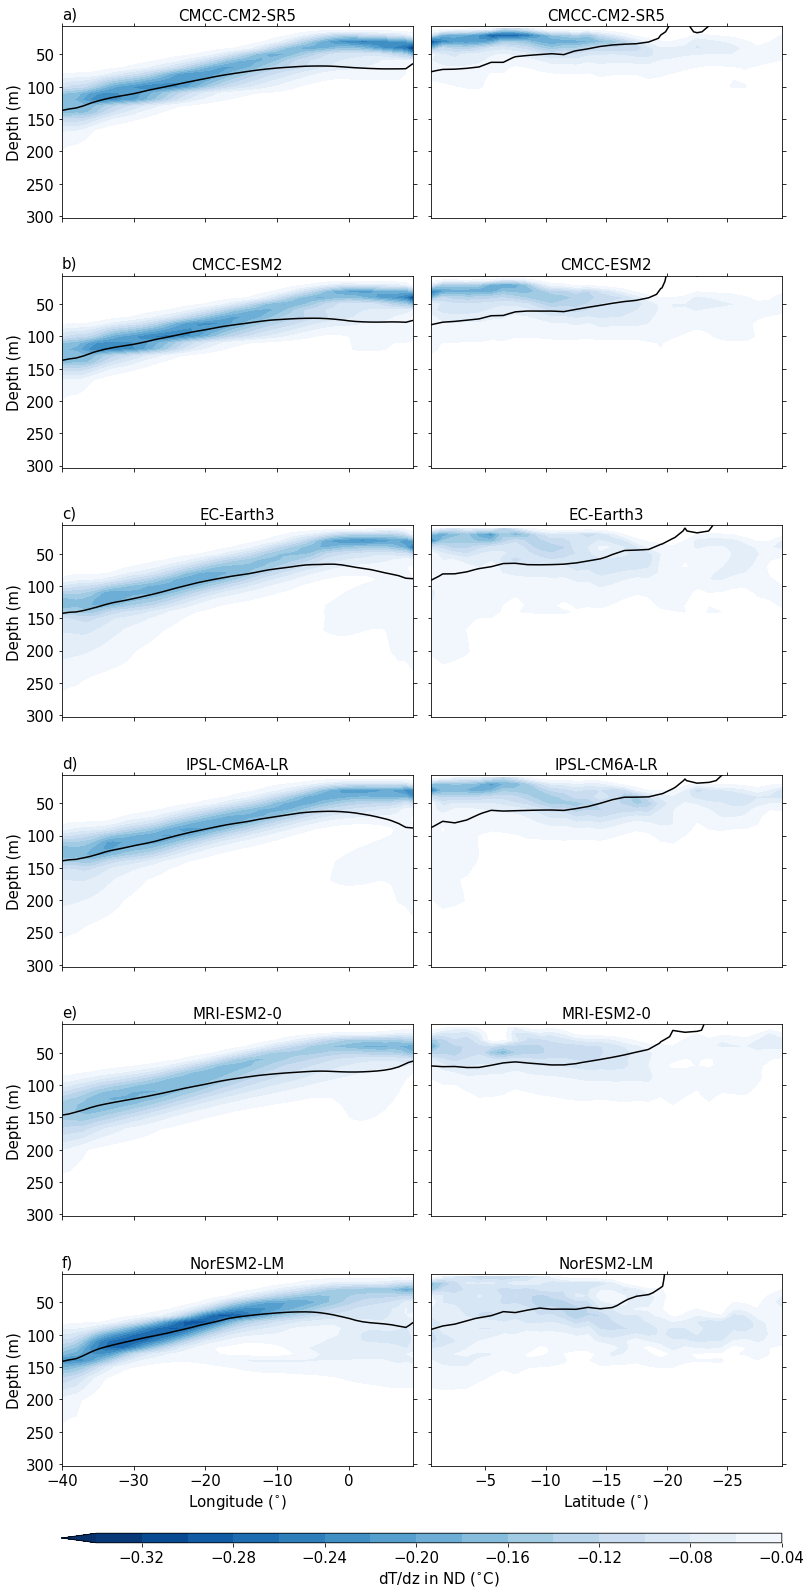

In [17]:
f,ax = plt.subplots(6,2,figsize=[10,20])
f.patch.set_facecolor('white')
cmap = plt.cm.Blues_r
levels= np.arange(-0.34,-0.02,0.02)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.3, wspace=0.05)
cax0 = inset_axes(ax[-2],
                 width='205%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.4,1,1),
                 bbox_transform=ax[-2].transAxes,
                 borderpad=0)
index= np.arange(0,len(ax),2)
n=0
for i in index:
    
    p0 = ax[i].contourf(dtdz_eq_all_nd.lon,
                   dtdz_eq_all_nd.depth,
                   dtdz_eq_all_nd[n,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    ax[i].set_xlim([-40,9])
    
    ax[i].contour(thetao_eq_all_nd.lon,
                   thetao_eq_all_nd.depth,
                   thetao_eq_all_nd[n,:,:],
                   colors='black',
                   levels=[20])
    
    p0 = ax[i+1].contourf(dtdz_af_all_nd.lat,
                   dtdz_af_all_nd.depth,
                   dtdz_af_all_nd[n,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='min')
    
    ax[i+1].contour(thetao_af_all.lat,
                   thetao_af_all.depth,
                   thetao_af_all_nd[n,:,:],
                   colors='black',
                   levels=[20])
    
    ax[i].set_title(omip1_models[n],fontsize=ftz)
    ax[i].set_ylabel('Depth (m)',fontsize=ftz)
    ax[i+1].set_title(omip1_models[n],fontsize=ftz)
    ax[i].invert_yaxis()
    ax[i+1].invert_yaxis()
    ax[i+1].invert_xaxis()
    ax[i].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=False)
    ax[i+1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=False)
    ax[i].text(0,1.04,string.ascii_lowercase[n]+')',transform=ax[i].transAxes,size=ftz)
    #ax[i+1].text(0,1.02,string.ascii_lowercase[i+1]+')',transform=ax[i+1].transAxes,size=ftz)
    n +=1
    
    
ax[-2].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[-2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[-1].tick_params(labelsize=ftz,left=True,right=True,top=True,labelleft=False,
                        labelright=False,labeltop=False,labelbottom=True)
ax[-1].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)
cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('dT/dz in ND ($^{\circ}$C)',fontsize=ftz)   
plt.savefig(path_fig+'figure_07_ND_dtdz_omip1.png',bbox_inches='tight',dpi=300)